In [8]:
import pandas as pd 

df = pd.read_csv('Dataset\BTC-USD.csv')

df = df.drop(columns=['Adj Close'],axis=1)
df = df.dropna()#Remove NA values

df.head()

,Date,Open,High,Low,Close,Volume
0,2018-01-01,14112.200195,14112.200195,13154.700195,13657.200195,10291200000
1,2018-01-02,13625.000000,15444.599609,13163.599609,14982.099609,16846600192
2,2018-01-03,14978.200195,15572.799805,14844.500000,15201.000000,16871900160
3,2018-01-04,15270.700195,15739.700195,14522.200195,15599.200195,21783199744
4,2018-01-05,15477.200195,17705.199219,15202.799805,17429.500000,23840899072


In [9]:
# Spliting the data into training and testing data
# Assuming 'df' is your DataFrame with the 'Date' column
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)  # Set 'Date' as the index

# Extract features and target variable
X = df.drop(columns=['Close'])
y = df['Close']

# Define the percentage to be used for training (80%)
train_percentage = 0.8
train_size = int(len(df) * train_percentage)

# Split the data into training and testing based on the percentage
X_train, X_test = X.iloc[:train_size, :], X.iloc[train_size:, :]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


Mean Squared Error: 2644643.2003898565
Mean Absolute Error: 1188.9756509456777
Root Mean Squared Error: 1626.2358993669573
R-squared: 0.9707721621933921


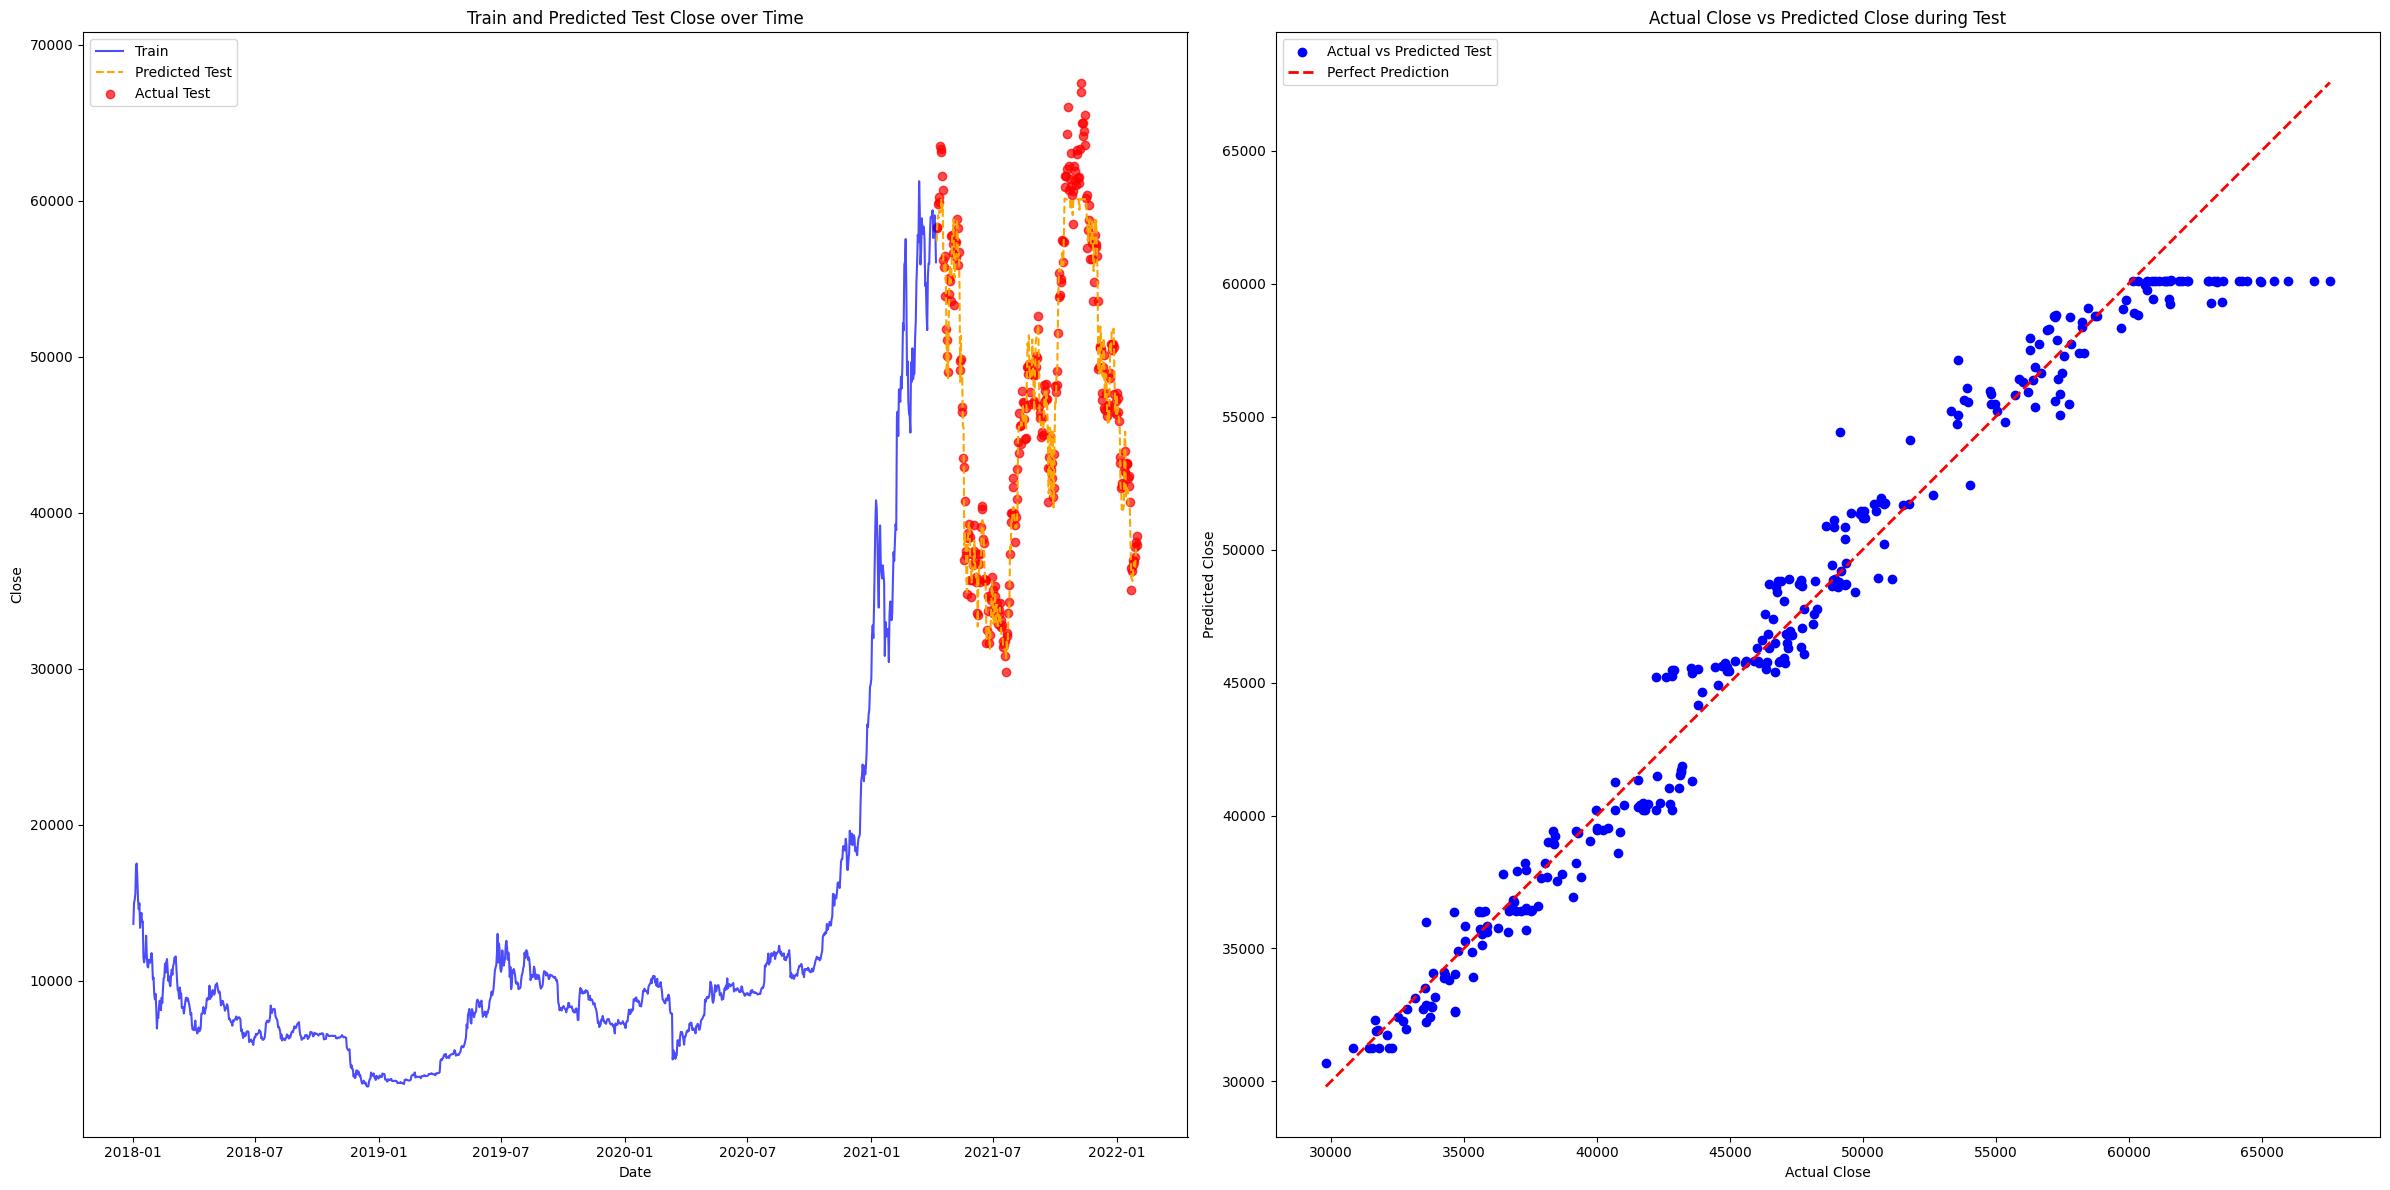

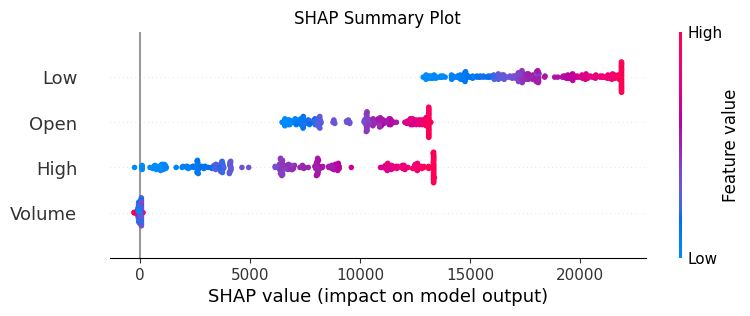

In [10]:
#Random Forest Regression Model
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pickle
import shap

# Create the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training set
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate Metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

#Save Model
with open('linear_regression_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

# Plotting Actual vs Predicted
plt.figure(figsize=(24, 12))

# Line Plot
plt.subplot(1, 2, 1)
plt.plot(df.index[:train_size], y_train, label='Train', color='blue', alpha=0.7)
plt.plot(df.index[train_size:], y_pred, label='Predicted Test', linestyle='--', color='orange')
plt.scatter(df.index[train_size:], y_test, label='Actual Test', color='red', alpha=0.7)
plt.title('Train and Predicted Test Close over Time')
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend()

# Scatter Plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted Test')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Perfect Prediction')
plt.title('Actual Close vs Predicted Close during Test')
plt.xlabel('Actual Close')
plt.ylabel('Predicted Close')
plt.legend()

plt.tight_layout()
plt.show()

# SHAP values
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

# Summary Plot
shap.summary_plot(shap_values, X_test, feature_names=X.columns, show=False)
plt.title('SHAP Summary Plot')
plt.show()

IndexError: arrays used as indices must be of integer or boolean type

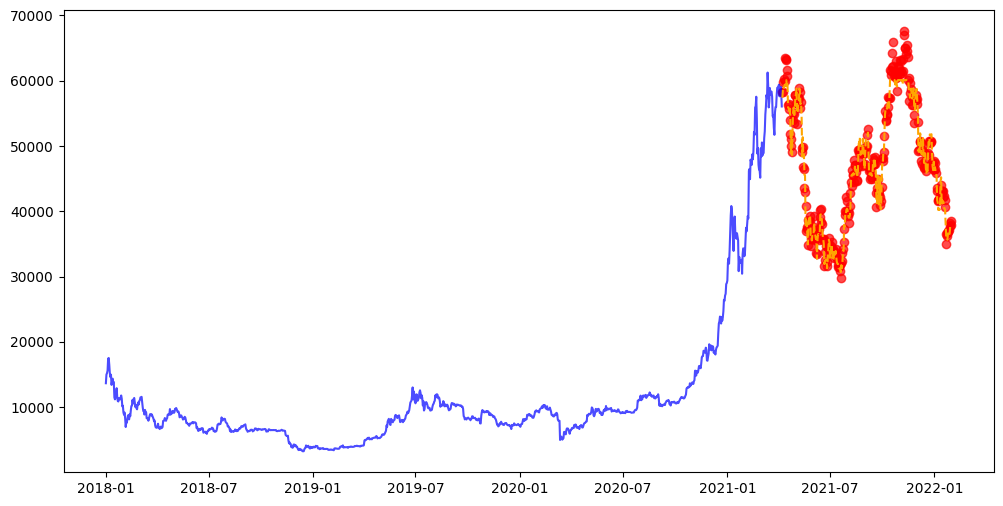

In [11]:
# Set the threshold for entry and exit points
threshold = 0.2

# Calculate the percentage change in predicted values
percentage_change = (y_pred - y_test) / y_test

# Find the indices where the percentage change exceeds the threshold
entry_points = percentage_change[percentage_change > threshold].index
exit_points = percentage_change[percentage_change < -threshold].index

# Plotting Actual vs Predicted with entry and exit points
plt.figure(figsize=(12, 6))

# Line Plot
plt.plot(df.index[:train_size], y_train, label='Train', color='blue', alpha=0.7)
plt.plot(df.index[train_size:], y_pred, label='Predicted Test', linestyle='--', color='orange')
plt.scatter(df.index[train_size:], y_test, label='Actual Test', color='red', alpha=0.7)

# Plot entry and exit points
plt.scatter(df.index[train_size:][entry_points], y_test[entry_points], color='green', label='Entry Points')
plt.scatter(df.index[train_size:][exit_points], y_test[exit_points], color='red', label='Exit Points')

plt.title('Train and Predicted Test Close over Time with Entry and Exit Points')
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Split the data into training and testing based on the percentage
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

# Fit the Seasonal ARIMA model
order = (1, 1, 1)  # You may need to adjust these values based on the characteristics of your time series data
seasonal_order = (1, 1, 1, 12)  # Assumes a seasonal period of 12 (for monthly data)

sarima_model = SARIMAX(y_train, order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
sarima_result = sarima_model.fit(disp=False)

# Make predictions on the test set
y_pred = sarima_result.get_forecast(steps=len(y_test))

# Extract forecasted values and confidence intervals
y_pred_values = y_pred.predicted_mean
confidence_intervals = y_pred.conf_int()

# Calculate Metrics
mse = mean_squared_error(y_test, y_pred_values)
mae = mean_absolute_error(y_test, y_pred_values)
rmse = mean_squared_error(y_test, y_pred_values, squared=False)
r2 = r2_score(y_test, y_pred_values)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

# Plotting Actual vs Predicted using Seasonal ARIMA
plt.figure(figsize=(12, 6))

# Line Plot
plt.subplot(1, 2, 1)
plt.plot(y_train.index, y_train, label='Train', color='blue', alpha=0.7)
plt.plot(y_test.index, y_pred_values, label='Predicted Test', linestyle='--', color='orange')
plt.fill_between(y_test.index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='orange', alpha=0.2, label='95% Confidence Interval')
plt.title('Train and Predicted Test Close using Seasonal ARIMA')
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend()

# Scatter Plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_values, color='blue', label='Actual vs Predicted Test')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Perfect Prediction')
plt.title('Actual Close vs Predicted Close during Test using Seasonal ARIMA')
plt.xlabel('Actual Close')
plt.ylabel('Predicted Close')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
from pmdarima import auto_arima

stepwise_fit = auto_arima(df['Close'], trace=True,
suppress_warnings=True)



In [ ]:
# Fit ARIMA model
from statsmodels.tsa.arima_model import ARIMA

order = (0,1,0)  
model = ARIMA(y_train, order=order)
results = model.fit()

# Display model summary
print(results.summary())

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(y_train.index, y_train, label='Original Series')
plt.plot(y_train.index, results.fittedvalues, color='red', label='Fitted Values')
plt.title('ARIMA Model Fit')
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend()
plt.show()

In [ ]:
import pandas as pd

def load_dataset():
    """
    Loads the dataset obtained from Yahoo Finance for Bitcoin (BTC).

    Returns:
    --------
    pandas.DataFrame:
        The loaded dataset containing the Bitcoin data.
    """
    # Add code to load the dataset here
    """
    Loads the BTC-USD dataset from Yahoo Finance.

    Returns:
    df (pandas.DataFrame): The loaded dataset.
    """
    df = pd.read_csv('Dataset\BTC-USD.csv')
    return df

df = load_dataset()
df.info()

# FILEPATH

# Dataset Documentation
"""
This code utilizes a dataset obtained from Yahoo Finance for Bitcoin (BTC). The dataset contains historical price data and other relevant information about Bitcoin. It is used for analyzing and performing calculations related to Bitcoin's price movements and trends.
"""
import pandas as pd

# Read the dataset from Yahoo Finance
df = pd.read_csv('BTC.csv')

# Perform data analysis on the dataset
# ...
# ...
# ...
